# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semanas 3 y 4

**Rotación de Personal - IBM**

#### **Nombres y matrículas:**

Juan Luis Ramirez Sanchez A01705151
Cesar Ivan Rojas Salazar 

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [167]:
# Incluye aquí todas las librerías que consideres necesarias:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os




from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from scipy import stats



In [90]:
# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

Employee attrition problem se refiere aquel fenomeno cuando los empleados constantemente se van de una empresa y son reemplazados por nuevas personas. Este problema es algo preocupante para las empresas debido a que la retencion de talentos es muy poca y las personas constantemente van y vienen. Una de las principales causas de este problema es la insatisfaccion laboral, falta de desarrollo profesional y vivir una cultura organizacional toxica. Todo esto significa una gran problematica para las empresas debido que tener una gran rotacion de personal puede significarse perdida de conocimiento y experiencia, costo de reclutamienot y capacitacion u impacto en la reputacion de la empresa.

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [2]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")



# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

Al momento de utilizar include ="all" del metodo "describe", este no solo calculara la estadistica descriptiva para las columnas numericas del DataFrame sino que tambien tomara en cuenta las columnas categoricas.

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:** 
**a)   Over18**:
Todos los empleados son mayores de 18 años por lo que esta columna no proporcionara informacion relevante para el analisis 

**b)	EmployeeCount**:
Esta columna no representa contener ninguna variabilidad debido a que solo nos dice el valor total de numero de empleados en la empresa

**c)	StandardHours**:
No agrega informacion valiosa para la rotacion de personal, debido a que es una variable que tiene el mismo valor para todas los empleados y se debe porque son las horas trabajadas por estos mimos

**d)	EmployeeNumber**:
Es un identificador o matricula que se le asigna a cada empleado individualmente por lo que no representa una variable valiosa para nuestro analisis




In [3]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

In [6]:
# Incluye en esta celda el código que consideres necesario para responder
# las preguntas del Ejercicio 5:
# Importar librerías necesarias
df_nuevo = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
variables_numericas_entero = df_nuevo.select_dtypes(include=['int']).columns.tolist()
variables_numericas_real = df_nuevo.select_dtypes(include=['float']).columns.tolist()
variables_binarias = [col for col in df_nuevo.columns if df_nuevo[col].nunique() == 2]
variables_categoricas_nominales = df_nuevo.select_dtypes(include=['object']).columns.tolist()
variables_categoricas_ordinales = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                                   'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
                                   'RelationshipSatisfaction', 'StockOptionLevel', 
                                   'WorkLifeBalance']

niveles_nominales = {col: df_nuevo[col].nunique() for col in variables_categoricas_nominales}
niveles_ordinales = {col: df_nuevo[col].nunique() for col in variables_categoricas_ordinales}

print("Variables numéricas de valor entero:", variables_numericas_entero)
print("Variables numéricas de valor real (flotante):", variables_numericas_real)
print("Variables binarias:", variables_binarias)
print("Variables categóricas nominales (total de niveles):", niveles_nominales)
print("Variables categóricas ordinales (total de niveles):", niveles_ordinales)



Variables numéricas de valor entero: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Variables numéricas de valor real (flotante): []
Variables binarias: ['Attrition', 'Gender', 'OverTime', 'PerformanceRating']
Variables categóricas nominales (total de niveles): {'Attrition': 2, 'BusinessTravel': 3, 'Department': 3, 'EducationField': 6, 'Gender': 2, 'JobRole': 9, 'MaritalStatus': 3, 'Over18': 1, 'OverTime': 2}
Variables categóricas ordinales (total de niveles): {'Education': 5, 'EnvironmentSatisfaction': 4, 'JobInvolvement': 4, 'JobLevel': 5, 'Jo

#### **Realiza los análisis necesarios para encontrar cuántas y cuáles de las variables del nuevo DataFrame son:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

i.	variables numéricas de valor entero:

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

ii.	variables numéricas de valor real (flotante):

0

iii.	variables binarias:

['Attrition', 'Gender', 'OverTime', 'PerformanceRating']

iv.	variables categóricas nominales. Indica el total de niveles que tiene cada una de estas variables:

{'Attrition': 2, 'BusinessTravel': 3, 'Department': 3, 'EducationField': 6, 'Gender': 2, 'JobRole': 9, 'MaritalStatus': 3, 'Over18': 1, 'OverTime': 2}

v.	variables categóricas ordinales. Indica el total de niveles que tiene cada una de estas variables:

{'Education': 5, 'EnvironmentSatisfaction': 4, 'JobInvolvement': 4, 'JobLevel': 5, 'JobSatisfaction': 4, 'PerformanceRating': 2, 'RelationshipSatisfaction': 4, 'StockOptionLevel': 4, 'WorkLifeBalance': 4}

++++++++ Termina la sección de agregar texto: ++++++++++++

# **Ejercicio 6:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

In [153]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++

def stratified_split(df, feature_cols, label_col, train_size, valid_size, test_size):
  
    train_valid_df, test_df = train_test_split(df, test_size=test_size,
                                               stratify=df[label_col], random_state=42)
    valid_size_adjusted = valid_size / (1 - test_size)
    train_df, valid_df = train_test_split(train_valid_df, test_size=valid_size_adjusted,
                                          stratify=train_valid_df[label_col], random_state=42)
    X_train = train_df[feature_cols]
    y_train = train_df[label_col]
    X_val = valid_df[feature_cols]
    y_val = valid_df[label_col]
    X_test = test_df[feature_cols]
    y_test = test_df[label_col]

    return X_train, X_val, X_test, y_train, y_val, y_test
features = df.drop('Attrition',axis=1)
print(features.columns)
XTrain,XVal,Xtest,ytrain,yval,ytest = stratified_split(df,features.columns,'Attrition',.7,.15,.15)


# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


# **Ejercicio 7:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las variables deberán seguir llamándose igual: ytrain, yval, ytest. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

# **Ejercicio 8:**


#### **Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables numéricas. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

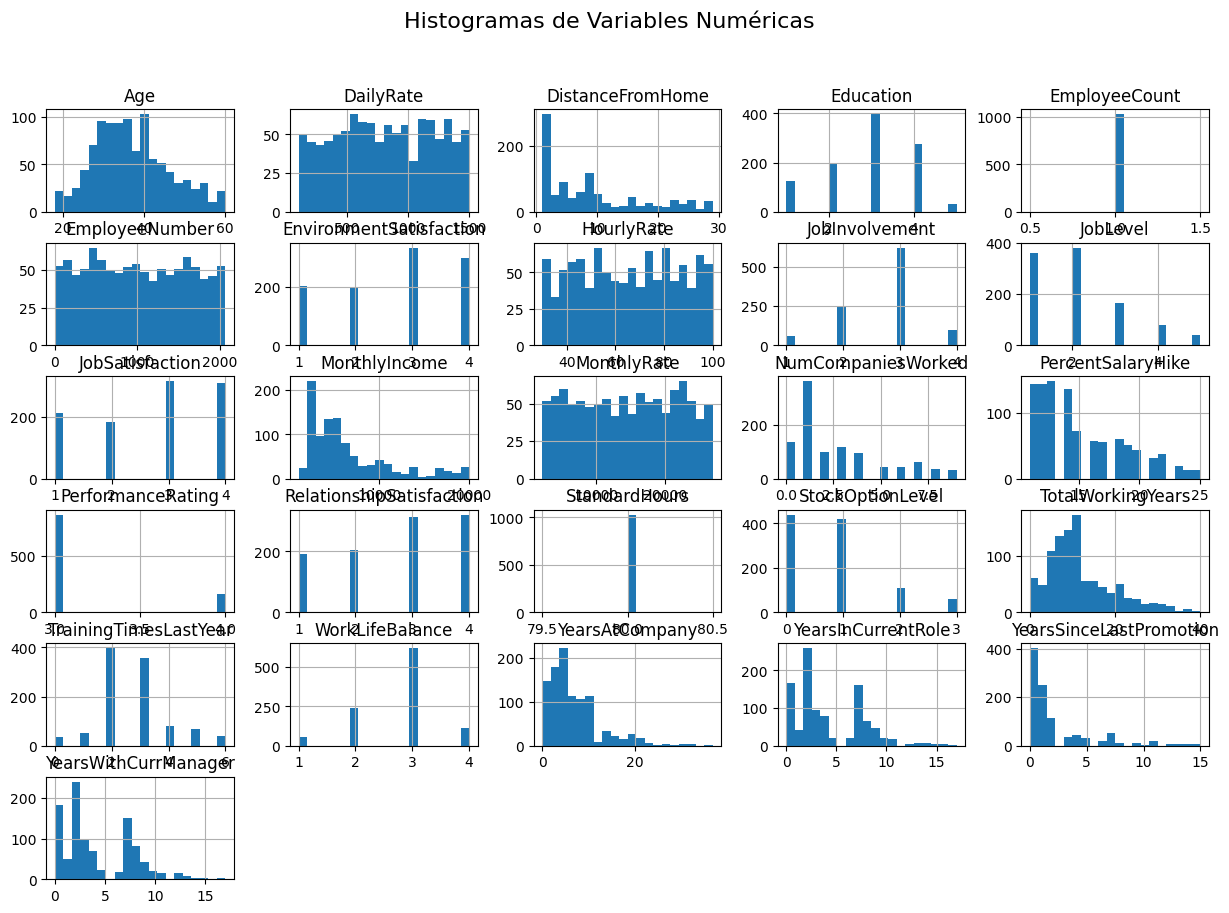

In [14]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
variables_numericas = X_train.select_dtypes(include=['int', 'float'])
variables_numericas.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogramas de Variables Numéricas", fontsize=16)
plt.show()
# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# **Ejercicio 9:**

#### **Se pueden analizar una buena cantidad de factores para buscar relaciones entre los factores y la variable de salida “Attrition”, la decisión de dejar un puesto. En particular, deberás ilustrar gráficamente la relación entre las siguientes variables, las cuales pueden aportar información al problema que estamos enfrentando de rotación de personal.**

a)	Las variables “Age” y “Attrition”.

b)	Las variables “Department” y “Attrition”.

c)	Las variables “Gender” y “Attrition”.

d)	Incluye alguna otra relación o relaciones que consideres relevantes.

e)	Con base a los gráficos obtenidos incluye tus conclusiones al respecto.


<Figure size 1000x600 with 0 Axes>

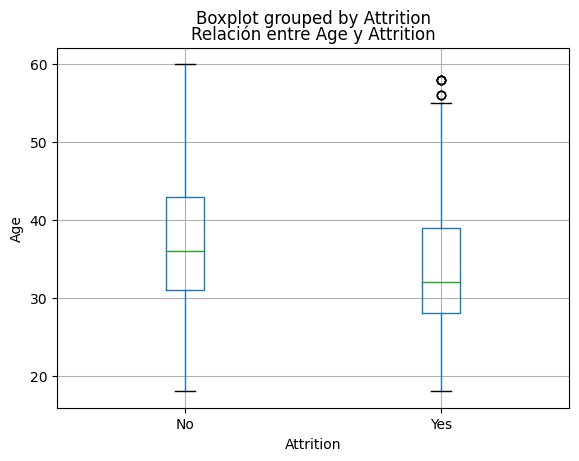

<Figure size 1000x600 with 0 Axes>

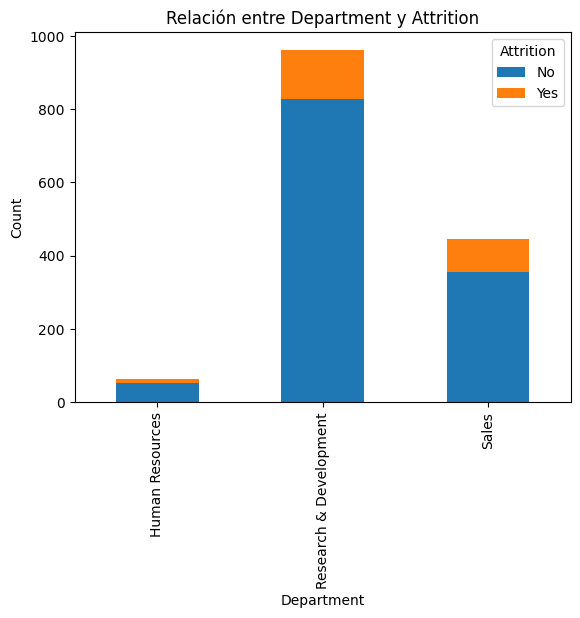

<Figure size 800x600 with 0 Axes>

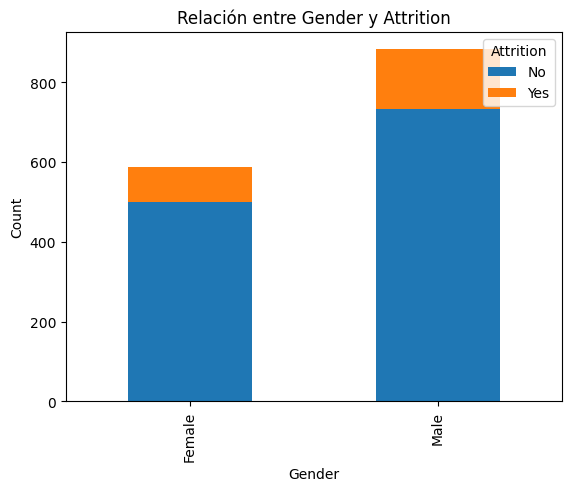

<Figure size 1000x600 with 0 Axes>

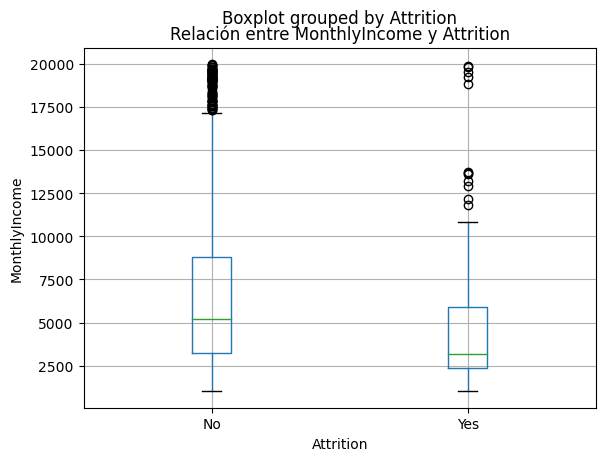

In [35]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

#Variables Age y Attrition
plt.figure(figsize=(10, 6))
df_nuevo.boxplot(column='Age', by='Attrition')
plt.title('Relación entre Age y Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

#Variables Department y Attrition
plt.figure(figsize=(10, 6))
df_nuevo.groupby(['Department', 'Attrition']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Relación entre Department y Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

#Variables Gender y Attrition
plt.figure(figsize=(8, 6))
df_nuevo.groupby(['Gender', 'Attrition']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Relación entre Gender y Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

#Varibales MonthyIncome y Attrition
plt.figure(figsize=(10, 6))
df_nuevo.boxplot(column='MonthlyIncome', by='Attrition')
plt.title('Relación entre MonthlyIncome y Attrition')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.show()


# **Ejercicio 10:**

#### **Encontrar la matriz de correlación de Pearson entre variables numéricas y a partir de dicha matriz encuentra aquellas correlaciones fuertes, positivas o negativas.**

**NOTA: Decimos que una correlación es fuerte cuando el valor absoluto es mayor a 0.7.**


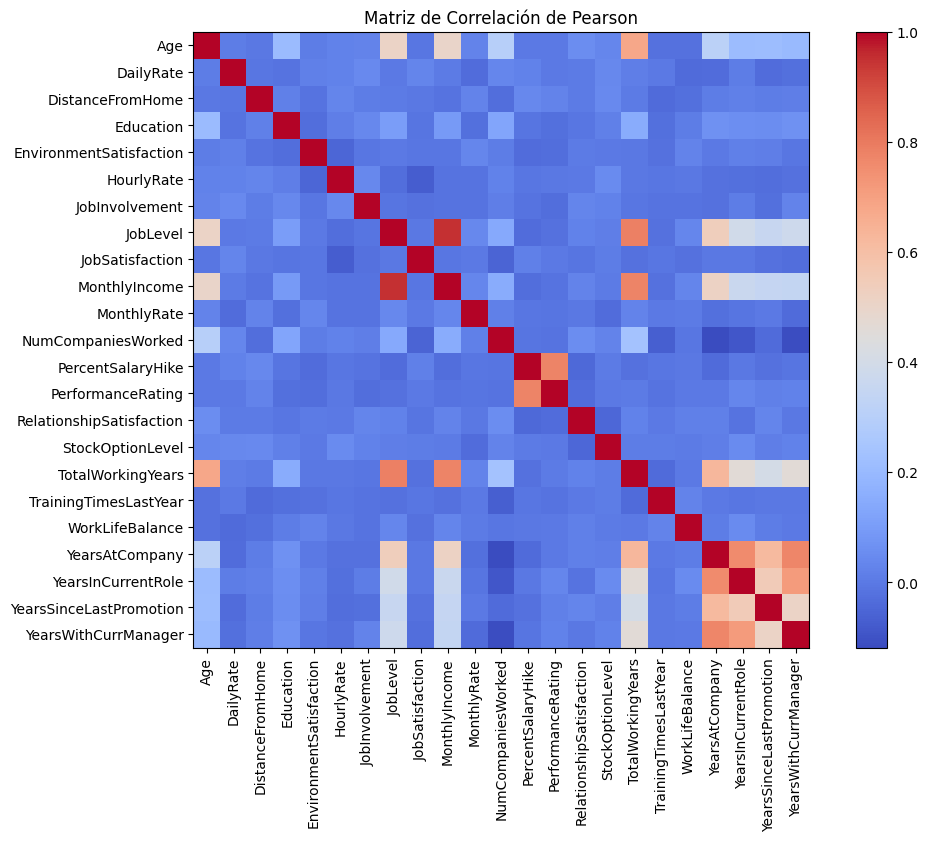

In [92]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.
correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matriz de Correlación de Pearson')
plt.show()

                             

# **Ejercicio 11:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**

**NOTA: A las variables numéricas aplica las transformaciones que hayas decidido en el Ejercicio 8; a las variables binarias y nominales puedes aplicarles las transformaciones One-Hot-Encoder; a las variables ordinales puedes aplicar la transformación OrdinalEncoder.**


In [180]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# NUMÉRICAS:
skewed_names=['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
log_transformer = FunctionTransformer(np.log1p,validate=True)
numericas_pipeline_nombres = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 
              'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
              'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
              'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 
              'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
              'YearsSinceLastPromotion', 'YearsWithCurrManager']
column_transformer = ColumnTransformer(
    transformers=[
        ('log',log_transformer,skewed_names),
        ('scale',StandardScaler(), numericas_pipeline_nombres)
    ],
    remainder='passthrough'
)

numericas_pipeline = Pipeline( steps=[("preprocessing",column_transformer)])
         

# BINARIAS Y NOMINALES:
catOHE_pipeline_nombres = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                           'JobRole', 'MaritalStatus', 'OverTime']
column_transformer2 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), catOHE_pipeline_nombres)
    ],
    remainder='passthrough'
)


# ORDINALES:
catOrd_pipeline = Pipeline(None)
catOrd_pipeline = None

columnasTransformer = ColumnTransformer(transformers=[
    ('log',log_transformer,skewed_names),
    ('scale',StandardScaler(), numericas_pipeline_nombres),
    ('onehot', OneHotEncoder(), catOHE_pipeline_nombres)
 ],
 remainder='passthrough')                                      


# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 12:**

#### **12)	Utilizando los conjuntos de entrenamiento y validación, encuentra los mejores hiperparámetros del modelo LogisticRegresion de Sklearn para obtener un modelo no sobre entrenado.**

**NOTA: Por el momento diremos que un modelo de clasificación no está sobreentrenado, si la diferencia de la exactitud (Accuracy) entre el conjunto de entrenamiento y el de validación es menor al 3%.**


In [181]:
modelo = LogisticRegression()
pipelineRL = Pipeline(steps=[('ct',columnasTransformer),('modeloRL',modeloRL)])
pipelineRL.fit(X_train, np.ravel(y_train))  

<class 'ValueError'>: could not convert string to float: 'Travel_Rarely'

In [182]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:")
y_pred_trainRL = pipelineRL.predict(XTrain)
y_pred_valRL = pipelineRL.predict(XVal)
print('accuracy-train', accuracy_score(ytrain, y_pred_trainRL))
print('accuracy-val', accuracy_score(yval, y_pred_valRL))

print("\n>>Matriz de Confusión:")
print(confusion_matrix(yval, y_pred_valRL))

print("\n>>Reporte varias métricas:")
print(classification_report(yval, y_pred_valRL))



>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación:


<class 'AttributeError'>: 'ColumnTransformer' object has no attribute 'transformers_'

# **Ejercicio 13:**

#### **Con base a la información del desempeño obtenido en el ejercicio anterior para los conjuntos de entrenamiento y validación, contesta los siguientes incisos:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

a)	¿Podemos decir que el modelo está subentrenado (underfitting) o sobreentrenado (overfitting)?

Se captura bien el patron de datos por lo que no parece presentar indicios de subentrenamiento

b)	Interpreta el valor numérico obtenido para la “precision” de la clase positiva.

Arroja un 62%, esto quiere decir que los demas casos de rotacion de personalos no los reconoce

c)	Interpreta el valor numérico obtenido para el “recall” de la clase positiva.

Cuando las instancias son positivas el modelo reconocio 93% para la clase 0 y 55% para la clase 1

d)	Con base al contexto de este problema, de rotación de personal, ¿cuál de las métricas, “precision” o “recall” consideras que es más importante disminuir su valor. Es decir, si no se puede disminuir el valor de ambos al mismo tiempo y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano a cero? Justifica tu respuesta con base al contexto del problema.

Mejorar la precision de la clase 1 debido que de esta manera la empresa podra tomar estrategias una vez que identificique a los empleados que se van

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 14:**

#### **Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los k Vecinos más Cercanos, kNN, usando la función KNeighborsClassifier() de Sklearn. Compara los resultados con el modelo de regresión logística e incluye tus conclusiones.**¶

In [183]:
knn = Pipeline(steps=[
    ('preprocessing',columnasTransformer),
    ('classifier',KNeighborsClassifier(n_neighbors=3))
])

param_grid = {'classifier__n_neighbors': [3, 5, 7, 9, 11],
              'classifier__weights': ['uniform', 'distance']}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(XTrain, ytrain)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)
print(knn.score(XTrain,ytrain))
print(knn.score(Xtest,ytest))

<class 'ValueError'>: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'EmployeeCount'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/lib/python3.11/site-packages/sklearn/utils/__init__.py", line 447, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 3804, in get_loc
    raise KeyError(key) from err
KeyError: 'EmployeeCount'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/sklearn/pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/joblib/memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/sklearn/pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py", line 751, in fit_transform
    self._validate_column_callables(X)
  File "/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py", line 459, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/sklearn/utils/__init__.py", line 455, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


# **Ejercicio 15:**

#### **Utilizando el mejor modelo obtenido previamente (regresión logística o kNN), utiliza algún método de submuestreo (undersampling) o sobremuestreo (oversampling) que consideres adecuado de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados, para obtener el mejor modelo posible.**

**NOTA: Ver la documentación correspondiente:** https://imbalanced-learn.org/stable/references/


In [184]:
nearmiss_pipe = make_pipeline_imb(
    columnasTransformer,
    NearMiss(version=1),
    KNeighborsClassifier(n_neighbors=11,weights="uniform")
)

nearmiss_pipe.fit(XTrain,ytrain)

y_pred = nearmiss_pipe.predict(XVal)
print("Accuracy:", accuracy_score(yval, y_pred))
print("Confusion Matrix:\n", confusion_matrix(yval, y_pred))
print("Classification Report:\n", classification_report(yval, y_pred))

y_pred = nearmiss_pipe.predict(XTrain)
print("Accuracy train:", accuracy_score(ytrain, y_pred))
print("Confusion Matrix train:\n", confusion_matrix(ytrain, y_pred))
print("Classification Report train:\n", classification_report(ytrain, y_pred))

<class 'NameError'>: name 'make_pipeline_imb' is not defined

++++++++ Inicia la sección de agregar texto: ++++++++++++

#### **Con dicho modelo:**

**a)	Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.**

Accuracy validation: 0.78280542
Accuracy train: 0.75486381

**b)	Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.**

[[158  27]

 [ 21  15]]

**c)	¿Qué métrica es la que consideras que explica mejor el buen desempeño de nuestro modelo?**

La metrica de f1-score

**d)	Compara los resultados con los modelos anteriores y escribe tus conclusiones.**

La regresion logistica que aunque en ciertos casos no es la mejor, para este problema ofrece muy buenos resultados.

++++++++ Termina la sección de agregar texto: ++++++++++++

# **Ejercicio 16:**

#### **Con base al mejor modelo que hayas obtenido hasta ahora, aplica la técnica de permutación de los factores con el método “permutation_importance()” de Sklearn, para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)	Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin). Utiliza el conjunto de validación.**

None

**b)	¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo?**

None

++++++++ Termina la sección de agregar texto: ++++++++++++


In [185]:
# Incluye a continuación todas las celdas de código y/o texto que consideres
# adecuadas para responder a la pregunta de este ejercicio.

features = df.columns.values.tolist()
for f in ['Attrition','Over18','EmployeeCount','StandardHours','EmployeeNumber']:
  features.remove(f)
print(features)
print(len(features))
permutation_ = permutation_importance(pipelineRL,XTrain,ytrain,n_repeats=10,random_state=0)
importance = permutation_.importances_mean
fig = sns.barplot(x=features,y=permutation_.importances_mean)
plt.xlabel("features")
plt.ylabel("importance")
plt.title("Feature vs importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show(fig)




<class 'ValueError'>: list.remove(x): x not in list

# **Ejercicio 17:**

#### **Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el problema de rotación de personal. Forma un nuevo conjunto de Entrenamiento con los conjuntos de entrenamiento y validación y utiliza el conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo, desplegando la siguiente información:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)	Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.**

None

**b)	Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.**

None

++++++++ Termina la sección de agregar texto: ++++++++++++

# >> **Fin de la Actividad de las Semanas 3 y 4** <<